## 多层感知机的从零开始实现

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

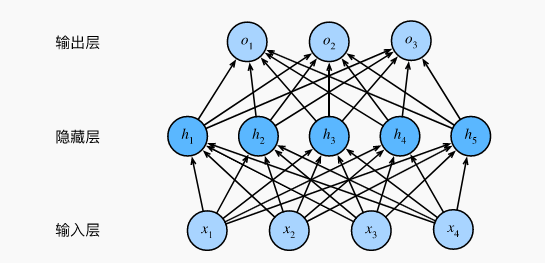

初始化参数模型

In [2]:
# 784 是吧一张二维28*28=784的图片拉成1维的784，一个图片也就对应了一个样本，所以可以理解为784个特征；
# 10 共有10中类别，也就是说输出层有10个单元；
# 隐藏层数，以及隐藏层单元数，都是超参数；怎么选择可看：https://zhuanlan.zhihu.com/p/100419971
# 这里直接写跟教材一样的个数；
num_inputs, num_outputs, num_hiddens = 784, 10, 256

# 这里要随机设置w b，否则会出问题；（问题记录！）
# 这里参数矩阵的形状 要完全弄懂怎么来的；
W1 = nn.Parameter(torch.randn(
    num_inputs, num_hiddens, requires_grad=True)* 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
W2 = nn.Parameter(torch.randn(
    num_hiddens, num_outputs, requires_grad=True)* 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]

激活函数

In [3]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

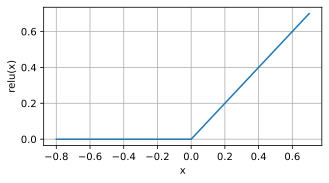

In [4]:
# 打印一下这个激活函数看看长的什么样子
x = d2l.arange(-0.8, 0.8, 0.1)
y = relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))

模型

In [5]:
def net(X):
    X = X.reshape((-1, num_inputs)) # 这样好处是，批量大小有不一样的话很有用；
    H = relu(X@W1 + b1)  # 这里“@”代表矩阵乘法
    return (H@W2 + b2)

> **损失函数**

- 目前来说遇到的分类问题的损失函数，都是交叉熵损失；

In [6]:
loss = nn.CrossEntropyLoss(reduction='none')

> 训练

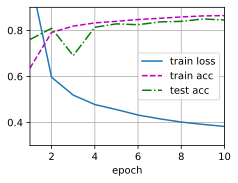

In [7]:
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

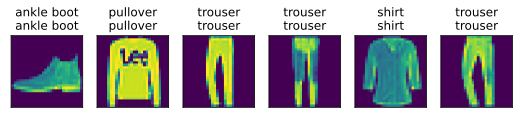

In [8]:
d2l.predict_ch3(net, test_iter)

## 多层感知机的简洁实现

In [9]:
import torch
from torch import nn
from d2l import torch as d2l

> 模型

In [12]:
net = nn.Sequential(nn.Flatten(), # 我们在线性层前定义了展平层（flatten），来调整网络输入的形状
                    nn.Linear(784, 256),
                    nn.ReLU(), # 对隐藏层用一下激活函数，参看这一章网络图；
                    nn.Linear(256, 10))

In [13]:
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

In [14]:
net.apply(init_weights);

> 训练

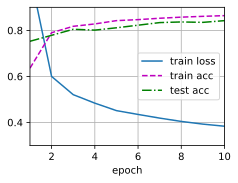

In [15]:
batch_sizet, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr)

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)